# Submission Proyek Analisis Data

 - Nama                 : Dwi Nafis Mahardika
 - Email                 : dikaest09@gmail.com
 - Bangkit Student ID	  : M129D4KY1921

# Rumusan Masalah Permasalahan Bisnis

- Bagaimana perubahan kualitas udara tiap harinya ?
- Bagaimana visualisasi antara PM10 dan CO ?
- Apa yang mempengaruhi peningkatan kadar SO2 ?

# Data Wrangling 

### Import Library yang Dipakai

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

In [5]:
path = "./data/"

filenames = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv",
    "PRSA_Data_Guanyuan_20130301-20170228.csv",
    "PRSA_Data_Gucheng_20130301-20170228.csv",
    "PRSA_Data_Huairou_20130301-20170228.csv",
    "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "PRSA_Data_Shunyi_20130301-20170228.csv",
    "PRSA_Data_Tiantan_20130301-20170228.csv",
    "PRSA_Data_Wanliu_20130301-20170228.csv",
    "PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

combined_df = pd.concat((pd.read_csv(path+f) for f in filenames), ignore_index=True)

combined_df.sample(20)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
36303,1240,2013,4,21,15,147.0,152.0,23.0,45.0,900.0,128.0,17.7,1005.4,2.0,0.0,SE,3.7,Changping
207058,31739,2016,10,13,10,137.0,162.0,3.0,73.0,1400.0,15.0,16.0,1013.3,11.0,0.0,NE,1.3,Gucheng
334970,19395,2015,5,18,2,171.0,178.0,35.0,70.0,1300.0,31.0,20.2,994.1,18.7,0.0,WNW,0.6,Tiantan
382259,31620,2016,10,8,11,6.0,6.0,2.0,16.0,400.0,52.0,15.1,1018.1,-1.1,0.0,N,2.0,Wanliu
211495,1112,2013,4,16,7,66.0,180.0,51.0,66.0,1500.0,18.0,12.1,997.5,0.5,0.0,ENE,1.7,Huairou
157073,16818,2015,1,30,17,7.0,15.0,7.0,23.0,400.0,51.0,3.0,1031.0,-22.8,0.0,WNW,2.2,Guanyuan
157881,17626,2015,3,5,9,118.0,122.0,53.0,84.0,2800.0,5.0,-0.8,1024.5,-14.7,0.0,E,1.4,Guanyuan
287700,7189,2013,12,25,12,210.0,218.0,83.0,102.0,3600.0,12.0,2.6,1021.6,-8.2,0.0,N,1.6,Shunyi
45072,10009,2014,4,22,0,42.0,35.0,7.0,36.0,400.0,74.0,14.0,1007.2,-4.3,0.0,ENE,1.2,Changping
318282,2707,2013,6,21,18,60.0,118.0,6.0,23.0,500.0,138.0,26.2,1004.3,16.7,0.0,WSW,2.2,Tiantan


### Mencari *Missing Value*

Masalah ini muncul karena adanya nilai yang hilang dari sebuah data dan biasanya direpresentasikan sebagai nilai 0 dalam library pandas. Hal ini biasanya terjadi karena adanya human error, masalah privasi, proses merging/join, dll.

In [6]:
combined_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

### Mencari *Duplicate Data*

Terjadi ketika terdapat sebuah observasi (semua nilai dalam satu unit baris) yang memiliki nilai yang sama persis pada setiap kolomnya.


In [7]:
print("jumlah duplikasi data : ",combined_df.duplicated().sum())

jumlah duplikasi data :  0


# Cleaning Data

Sama halnya dengan pakaian kotor yang harus dibersihkan, data yang kotor juga harus kita bersihkan untuk memastikan ia tidak mempengaruhi hasil analisis yang akan kita lakukan nantinya. Nah, pada kesempatan ini, kita akan mengupas tuntas berbagai teknik dan konsep penting dalam proses pembersihan data.

### Menentukan *Missing Value*

Untuk mencegah banyaknya kehilangan informasi kita akan menggunakan teknik **Imputation**. Metode ini bekerja dengan cara mengisi (fill) missing value dengan nilai tertentu. Hal ini tentunya akan mencegah hilangnya informasi akibat missing value.

#### Memecah data 
Dilakukan untuk mempermudah melihat data yang diambil

In [8]:
stations = combined_df['station'].unique()
stations

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [9]:
stations = combined_df['station'].unique()

station_data = {}

for station in stations:
    station_data[station] = combined_df[combined_df['station'] == station]

for station, df in station_data.items():
    print(f"{station} DataFrame:")
    print(df.head())

Aotizhongxin DataFrame:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
Changping DataFrame:
       No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
35064   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
35065   2  2013      3    1     1   

###### Terpantau di atas jumlah subdata adalah 12 buah 

## Mencari *Missing Value* pada kolom

In [10]:
missing_values_per_column = combined_df.isna().sum()
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]
columns_with_missing_values_names = columns_with_missing_values.index.tolist()

for n in columns_with_missing_values_names:
  print(n)

PM2.5
PM10
SO2
NO2
CO
O3
TEMP
PRES
DEWP
RAIN
wd
WSPM


#### Penerapan Interpolasi 
Merupakan salah satu pendekatan numerik yang digunakan untuk menghitung titik data baru berdasarkan range data yang sudah ada. Perhitungan ini menggunakan sebuah persamaan garis linear ataupun polynomial.

In [11]:
for station, df in station_data.items(): 
  for column in columns_with_missing_values_names:
    df[column].interpolate(method='linear', limit_direction='forward', inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_10332\2744887869.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction='forward', inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_10332\2744887869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].interpolate(method='linear', limi

#### Penerapan Imputation
Metode ini bekerja dengan cara mengisi (fill) missing value dengan nilai tertentu. Hal ini tentunya akan mencegah hilangnya informasi akibat missing value.

In [12]:
for station, df in station_data.items():
  mode_values = df['wd'].mode()

  mode_value = mode_values[0]  # Extract the first mode value

  df['wd'].fillna(value=mode_value, inplace=True)
  
  print(f"Mode for station {station}: {mode_value}")

Mode for station Aotizhongxin: NE
Mode for station Changping: NNW
Mode for station Dingling: NNW
Mode for station Dongsi: ENE
Mode for station Guanyuan: NE
Mode for station Gucheng: N
Mode for station Huairou: NW
Mode for station Nongzhanguan: ENE
Mode for station Shunyi: NNE
Mode for station Tiantan: ENE
Mode for station Wanliu: NE
Mode for station Wanshouxigong: NE


C:\Users\Hp\AppData\Local\Temp\ipykernel_10332\2841736168.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wd'].fillna(value=mode_value, inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_10332\2841736168.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wd'].fillna(value=mode_value, inplace=True)


#### Testing apakah terdepat data yang rusak 

In [13]:
for station, df in station_data.items():
    print(f"{station} DataFrame:")
    print(df.isna().sum())

Aotizhongxin DataFrame:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
Changping DataFrame:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
Dingling DataFrame:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        2
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
Dongsi DataFrame:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP   

# Explanation Data Air Quality 

In [14]:
for station, df in station_data.items():
  print(f"{station} DataFrame:")
  print(df.sample(7))

station_data['Guanyuan'].sample(7)

Aotizhongxin DataFrame:
          No  year  month  day  hour       PM2.5        PM10        SO2  \
24392  24393  2015     12   12     8   36.000000   36.000000  17.000000   
6924    6925  2013     12   14    12   21.000000   26.000000  15.000000   
5419    5420  2013     10   12    19   69.000000  126.000000   9.710400   
3407    3408  2013      7   20    23  116.000000  119.000000   9.000000   
13903  13904  2014     10    1     7   43.000000   82.000000   7.000000   
26877  26878  2016      3   24    21   18.000000   69.000000   2.000000   
15837  15838  2014     12   20    21   57.639535  132.895349  29.895349   

              NO2           CO         O3  TEMP    PRES  DEWP  RAIN   wd  \
24392   66.000000  1200.000000    9.00000  -1.5  1022.4  -6.8   0.0   NE   
6924    25.000000  1033.333333   35.77140   4.8  1022.0 -17.6   0.0  ENE   
5419   133.000000  1200.000000    1.00000  17.7  1011.8   8.8   0.0  ENE   
3407    52.000000  1100.000000  111.00000  26.1   999.5  21.5   0.0   S

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
169852,29597,2016,7,16,4,32.0,32.0,2.0,33.0,600.0,47.0,21.6,998.2,16.3,0.0,NNE,1.3,Guanyuan
163431,23176,2015,10,22,15,21.0,21.0,3.0,41.0,500.0,28.0,10.9,1019.1,5.0,0.0,N,1.0,Guanyuan
144367,4112,2013,8,19,7,16.0,24.0,3.0,63.0,400.0,6.0,24.2,1006.4,17.0,0.0,NE,1.4,Guanyuan
171687,31432,2016,9,30,15,116.0,165.0,15.0,53.0,800.0,157.0,24.4,1009.1,9.2,0.0,SSE,0.9,Guanyuan
140277,22,2013,3,1,21,11.0,14.0,24.0,51.0,500.0,42.0,0.6,1030.1,-16.7,0.0,ENE,0.8,Guanyuan
169641,29386,2016,7,7,9,127.0,127.0,17.0,37.0,1400.0,80.0,27.8,1008.3,20.9,0.0,SE,1.0,Guanyuan
154708,14453,2014,10,24,4,162.0,177.0,4.0,91.0,1800.0,2.0,8.5,1006.2,8.5,0.0,E,0.7,Guanyuan


## Data *Air Quality* setiap tahunnya 
Data ini nantinya akan digunakan untuk mencari mean disetiap samplenya 

In [15]:
clean_combined_df = pd.concat(station_data.values(), ignore_index=True)
clean_combined_df['datetime'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])
years = clean_combined_df['year'].unique()

quality_air_eachyear = {}
for year in years:
  tdf = clean_combined_df[clean_combined_df['year'] == year]
  print(f"data pm2.5 pada tahun: {year}")
  print(tdf.sample(7))
  quality_air_eachyear[year] = tdf


data pm2.5 pada tahun: 2013
          No  year  month  day  hour      PM2.5        PM10         SO2  \
4470    4471  2013      9    3     6  95.000000  109.000000    5.000000   
71836   1709  2013      5   11     4  11.000000   10.000000    4.000000   
214715  4332  2013      8   28    11  43.000000   34.000000    8.000000   
142744  2489  2013      6   12    16  76.000000   89.000000   32.000000   
212558  2175  2013      5   30    14  54.000000  136.000000   15.000000   
181151  5832  2013     10   29    23  60.000000  134.000000    9.000000   
212185  1802  2013      5   15     1  51.368421  216.157895  100.258477   

             NO2           CO          O3  TEMP    PRES  DEWP  RAIN   wd  \
4470    66.00000  1000.000000    1.000000  19.2  1011.7  17.7   0.0   NE   
71836   12.00000   200.000000   44.000000  12.7   987.6  -0.6   0.0    E   
214715  31.00000  2200.000000   20.000000  24.6   990.7  23.4   0.0   NE   
142744  19.00000  1000.000000  219.000000  26.3  1000.6  16.8   0.0

## Mencari *mean* setiap sample 

In [16]:
average_pm25_each_station = clean_combined_df.groupby('station')['PM2.5'].mean()

average_pm25_each_station

station
Aotizhongxin     82.540623
Changping        70.986438
Dingling         66.845557
Dongsi           86.144243
Guanyuan         82.897522
Gucheng          84.074802
Huairou          69.501747
Nongzhanguan     85.079472
Shunyi           79.437962
Tiantan          82.033097
Wanliu           83.467612
Wanshouxigong    85.067548
Name: PM2.5, dtype: float64

# Data NO2 Setiap Bulannya 

In [17]:
clean_combined_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420746.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.601416,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.171276,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674,NaN


In [23]:
mean_PM10_monthly = clean_combined_df.groupby(['year', 'month'])['PM10'].mean()
mean_CO_monthly = clean_combined_df.groupby(['year', 'month'])['CO'].mean()

print(mean_PM10_monthly)
print(mean_CO_monthly)

year  month
2013  3        130.249832
      4         95.931510
      5        134.408462
      6        115.859546
      7         76.424118
      8         77.461302
      9         96.402862
      10       112.675042
      11        96.244676
      12        96.066980
2014  1        123.645105
      2        156.681982
      3        136.205645
      4        144.124306
      5        116.993721
      6         74.037310
      7        109.784067
      8         85.454615
      9         90.316042
      10       146.505544
      11       125.516979
      12        95.371698
2015  1        113.719538
      2        120.783495
      3        146.016252
      4        115.078432
      5         95.617059
      6         80.524329
      7         75.412444
      8         64.862455
      9         63.247743
      10        89.317148
      11       120.251620
      12       159.541611
2016  1         82.528674
      2         57.133800
      3        134.401938
      4        114.085648


In [18]:
mean_PM10 = clean_combined_df.groupby(['year', 'month'])['PM10'].mean()
mean_CO = clean_combined_df.groupby(['year', 'month'])['CO'].mean()

print(mean_PM10)
print(mean_CO)

year  month
2013  3        130.249832
      4         95.931510
      5        134.408462
      6        115.859546
      7         76.424118
      8         77.461302
      9         96.402862
      10       112.675042
      11        96.244676
      12        96.066980
2014  1        123.645105
      2        156.681982
      3        136.205645
      4        144.124306
      5        116.993721
      6         74.037310
      7        109.784067
      8         85.454615
      9         90.316042
      10       146.505544
      11       125.516979
      12        95.371698
2015  1        113.719538
      2        120.783495
      3        146.016252
      4        115.078432
      5         95.617059
      6         80.524329
      7         75.412444
      8         64.862455
      9         63.247743
      10        89.317148
      11       120.251620
      12       159.541611
2016  1         82.528674
      2         57.133800
      3        134.401938
      4        114.085648


# Data SO2 Setiap Bulannya 


In [19]:
mean_SO2 = clean_combined_df.groupby(['year', 'month'])['SO2'].mean()
mean_SO2_dict = mean_SO2.to_dict()

mean_SO2_dict

{(2013, 3): 38.530269982078856,
 (2013, 4): 20.686865842151676,
 (2013, 5): 26.37684125490698,
 (2013, 6): 13.607298780864198,
 (2013, 7): 7.273532110588412,
 (2013, 8): 6.903813513664875,
 (2013, 9): 10.196775411522633,
 (2013, 10): 15.604847944046197,
 (2013, 11): 21.838826296296297,
 (2013, 12): 38.5278829749104,
 (2014, 1): 53.39191308243728,
 (2014, 2): 57.92094494047619,
 (2014, 3): 34.75011200716846,
 (2014, 4): 17.128935185185185,
 (2014, 5): 15.162549472063867,
 (2014, 6): 6.2812220270154855,
 (2014, 7): 6.5418458781362006,
 (2014, 8): 5.377576164874552,
 (2014, 9): 6.684780092592592,
 (2014, 10): 8.910338261648745,
 (2014, 11): 16.44337962962963,
 (2014, 12): 28.177658303464757,
 (2015, 1): 34.2585592144564,
 (2015, 2): 26.66371527777778,
 (2015, 3): 20.7919186827957,
 (2015, 4): 9.28534722222222,
 (2015, 5): 8.722278225806452,
 (2015, 6): 6.707060185185185,
 (2015, 7): 4.794186827956989,
 (2015, 8): 3.594590053763441,
 (2015, 9): 4.894155092592593,
 (2015, 10): 5.85422267025

In [26]:
rain_month = [6,7,8]
dry_mount = [11,12,1,2]

rain_SO2 = {}
dry_SO2 = {}

for key, value in mean_SO2_dict.items():
    if key[1] in rain_month:
        rain_SO2[key] = value
    elif key[1] in dry_mount:
        dry_SO2[key] = value

print(rain_SO2)
print(len(rain_SO2))
print(dry_SO2)
print(len(dry_SO2))

{(2013, 6): 13.607298780864198, (2013, 7): 7.273532110588412, (2013, 8): 6.903813513664875, (2014, 6): 6.2812220270154855, (2014, 7): 6.5418458781362006, (2014, 8): 5.377576164874552, (2015, 6): 6.707060185185185, (2015, 7): 4.794186827956989, (2015, 8): 3.594590053763441, (2016, 6): 5.0187731481481475, (2016, 7): 3.47793458781362, (2016, 8): 2.8578629032258065}
12
{(2013, 11): 21.838826296296297, (2013, 12): 38.5278829749104, (2014, 1): 53.39191308243728, (2014, 2): 57.92094494047619, (2014, 11): 16.44337962962963, (2014, 12): 28.177658303464757, (2015, 1): 34.2585592144564, (2015, 2): 26.66371527777778, (2015, 11): 11.772222222222222, (2015, 12): 19.31423611111111, (2016, 1): 19.873823924731184, (2016, 2): 14.570821360153257, (2016, 11): 11.118888888888888, (2016, 12): 17.04945116487455, (2017, 1): 18.554995519713263, (2017, 2): 17.608506944444443}
16


# Visualization & Explanatory Analysis

## Bagaimana perubahan kualitas udara tiap harinya ?

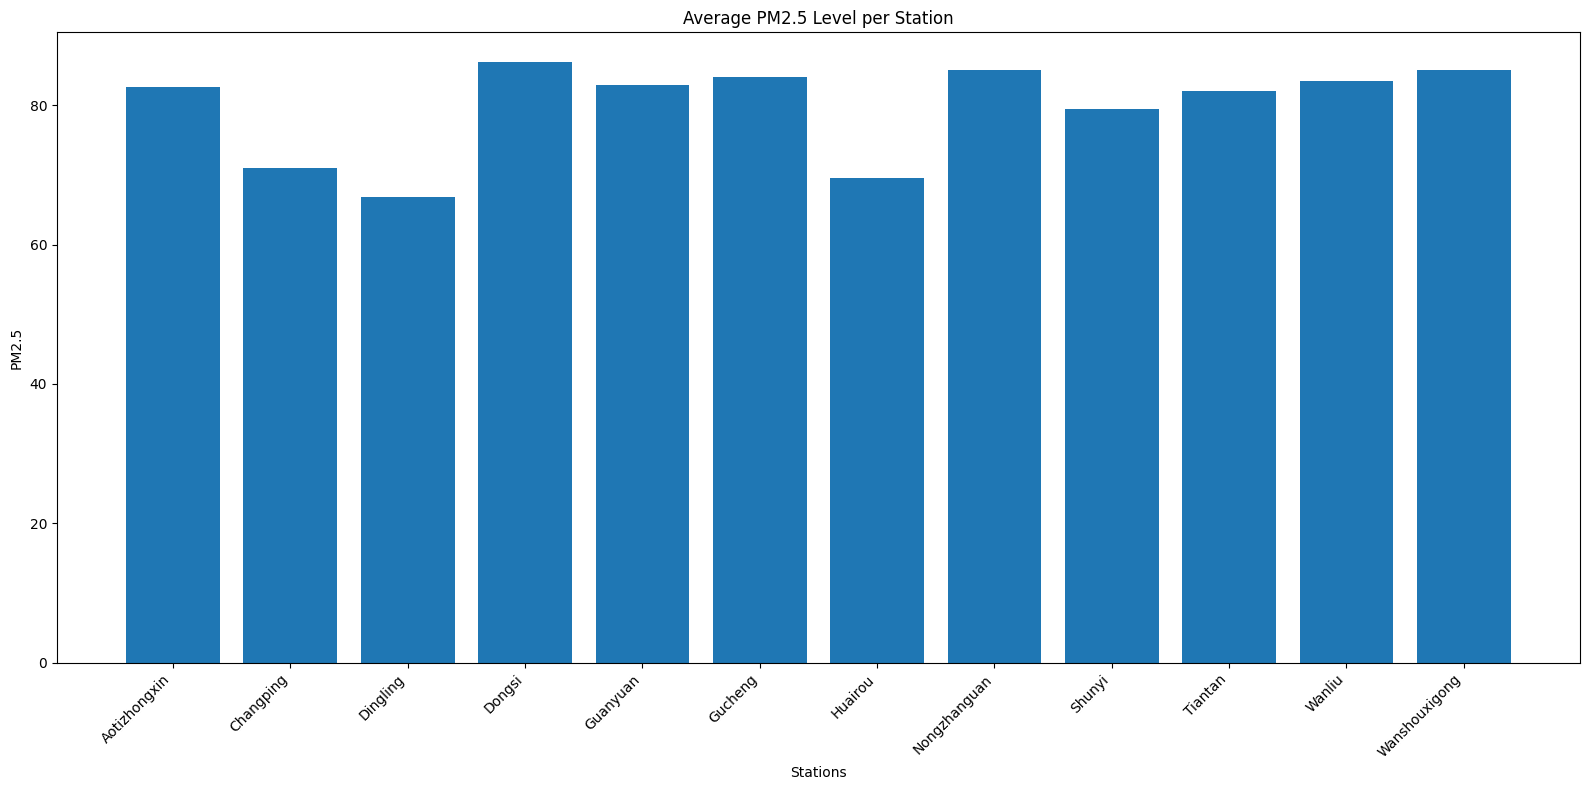

In [21]:
plt.figure(figsize=(16, 8))
plt.bar(x=average_pm25_each_station.keys(), height=average_pm25_each_station.values,)
plt.xlabel('Stations')
plt.ylabel('PM2.5')
plt.title('Average PM2.5 Level per Station')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Bagaimana visualisasi antara PM10 dan CO ?

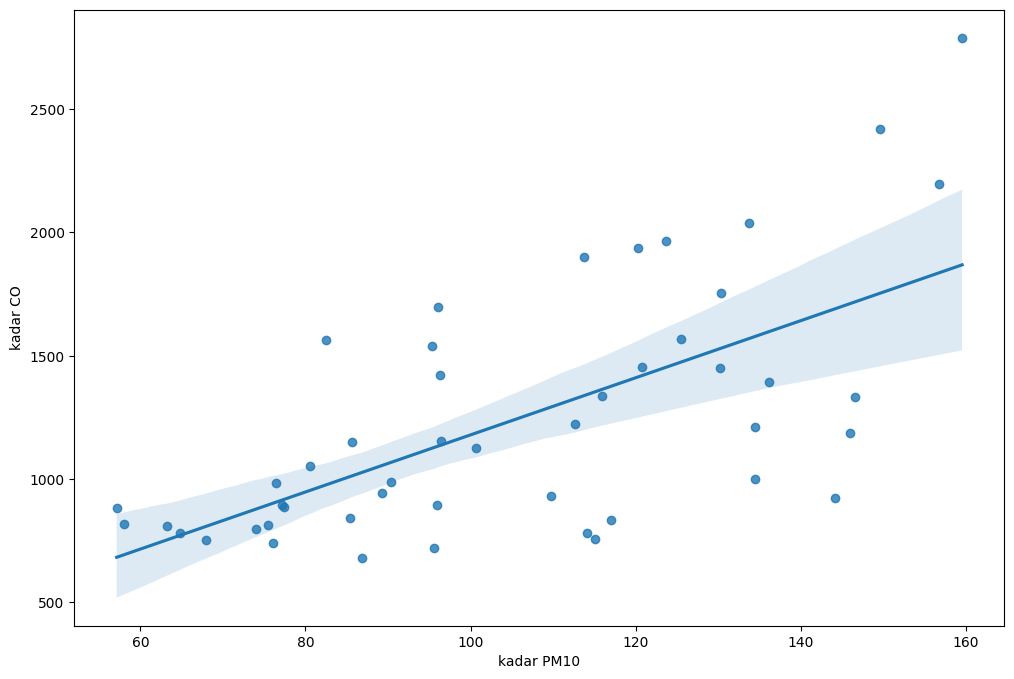

In [24]:
plt.figure(figsize=(12,8))
sns.regplot(x=mean_PM10_monthly.values,y=mean_CO_monthly.values)
plt.xlabel("kadar PM10")
plt.ylabel("kadar CO")

plt.show()

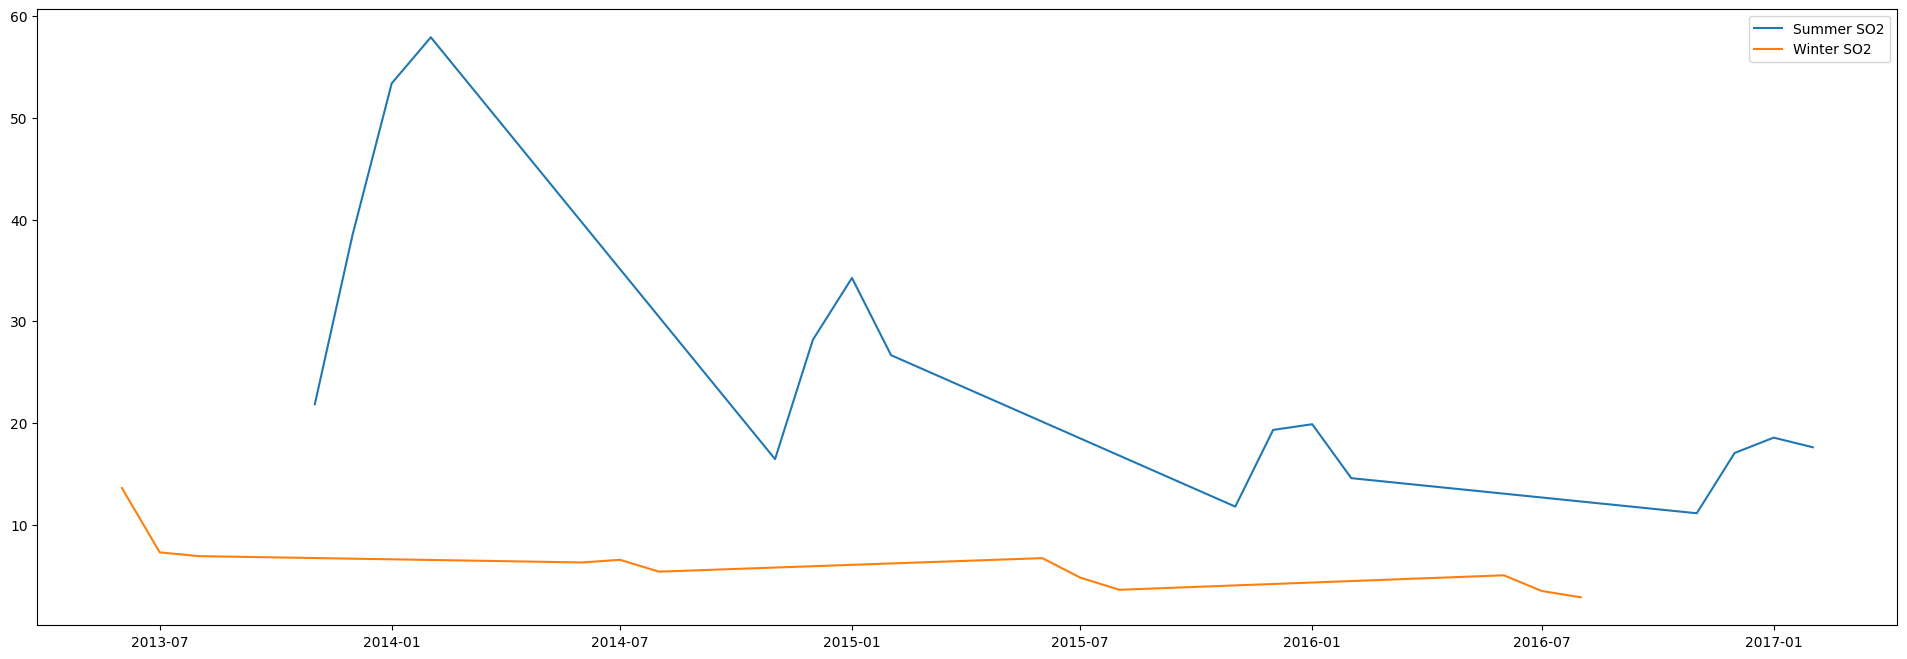

In [27]:
# Convert the keys to datetime objects
summer_dates = [datetime.datetime(year, month, 1) for year, month in dry_SO2.keys()]
winter_dates = [datetime.datetime(year, month, 1) for year, month in rain_SO2.keys()]

# Create a new figure
plt.figure(figsize=(24,8))

# Plot dry_SO2 and rain_SO2
plt.plot(summer_dates, list(dry_SO2.values()), label='Summer SO2')
plt.plot(winter_dates, list(rain_SO2.values()), label='Winter SO2')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Conclusion

- Rata-rata level PM2.5 antar stasiun terpantau relatif sama berkisar jarak terjauh kurang lebih 20 point ini menunjukkan bahwa antar stasiun dichina terpantau cukup sama hanya memiliki perbedaan tertinggi pada stasiun dongsi dan tersendah Dingling
- Data visualisasi yang ditampilkan menunjukkan korelasi antar PM10 dan Co yang menunjukkan adanya hubungan regresi linear sederhana yang dimana ini menunjukkan bahwa kenaikkan PM10 selalu disertai oleh kenaikkan CO 
- Pada visual data yang ditampilkan menggunakan tampilan bar chart disini dapat disimpulkan bahwa kandungan sulfur dioksida cenderung lebih tinggi pada musim kering atau panas dibandingkan pada musim hujan hal ini dapat memperngaruhi kesehaan manusia khususnya gangguan pernafasan